In [3]:
from enum import Enum
from pathlib import Path
from typing import Tuple, Union

import numpy
import torch
from PIL import Image
from draugr.numpy_utilities import SplitEnum
from draugr.opencv_utilities import cv2_resize
from draugr.opencv_utilities.bounding_boxes import draw_boxes
from draugr.torch_utilities import (
    SupervisedDataset,
    float_chw_to_hwc_uint_tensor,
    global_torch_device,
    to_tensor,
    uint_hwc_to_chw_float_tensor,
)
from matplotlib import pyplot
from sorcery import assigned_names
from torchvision.transforms import Compose, Resize, ToTensor

from neodroidvision.utilities import (
    TupleCompose,
    TupleRandomHorizontalFlip,
    TupleToTensor,
)

from neodroidvision.data.mixed import PennFudanDataset

tensor([[[0.4980, 0.3451, 0.3098,  ..., 0.4667, 0.5176, 0.5412],
         [0.5529, 0.5804, 0.4980,  ..., 0.5843, 0.5490, 0.5294],
         [0.4510, 0.4784, 0.5882,  ..., 0.5882, 0.4980, 0.5412],
         ...,
         [0.6118, 0.6157, 0.6196,  ..., 0.6667, 0.7059, 0.7216],
         [0.6196, 0.6118, 0.6118,  ..., 0.6667, 0.6824, 0.6863],
         [0.6039, 0.5843, 0.5843,  ..., 0.6941, 0.7059, 0.7490]],

        [[0.4510, 0.3059, 0.2824,  ..., 0.4588, 0.5294, 0.5686],
         [0.4902, 0.5216, 0.4549,  ..., 0.5843, 0.5725, 0.5686],
         [0.3529, 0.3882, 0.5176,  ..., 0.6039, 0.5373, 0.5961],
         ...,
         [0.4980, 0.5059, 0.5020,  ..., 0.5216, 0.5686, 0.5882],
         [0.5176, 0.5098, 0.5098,  ..., 0.5216, 0.5451, 0.5490],
         [0.5176, 0.4941, 0.4941,  ..., 0.5490, 0.5686, 0.6157]],

        [[0.3961, 0.2392, 0.2118,  ..., 0.2627, 0.2980, 0.3098],
         [0.4314, 0.4588, 0.3843,  ..., 0.3843, 0.3333, 0.2980],
         [0.2902, 0.3216, 0.4510,  ..., 0.3922, 0.2784, 0.

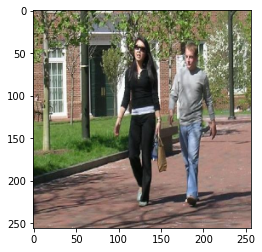

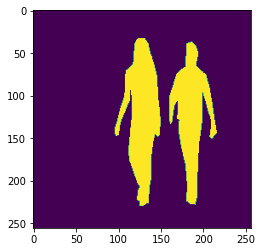

In [4]:
def main_binary(p=Path.home() / "Data" / "Datasets" / "PennFudanPed"):

    dataset = PennFudanDataset(p, SplitEnum.training)

    global_torch_device(override=global_torch_device("cpu"))

    idx = -2
    img, mask = dataset[idx]
    print(img)
    print(img.shape, mask.shape)
    pyplot.imshow(float_chw_to_hwc_uint_tensor(img))
    pyplot.show()
    pyplot.imshow(mask.squeeze(0))
    pyplot.show()


main_binary(
    Path.home() / "Data3" / "PennFudanPed",
    # Path.home() / "Data" / "Datasets" / "PennFudanPed",
)

tensor([[[0.5373, 0.4902, 0.3451,  ..., 0.5059, 0.5686, 0.5216],
         [0.5529, 0.3490, 0.3647,  ..., 0.5176, 0.5333, 0.5373],
         [0.7333, 0.4667, 0.5882,  ..., 0.4706, 0.4980, 0.5569],
         ...,
         [0.6235, 0.6196, 0.6157,  ..., 0.6863, 0.6824, 0.6745],
         [0.6196, 0.6078, 0.6000,  ..., 0.6980, 0.7020, 0.6980],
         [0.6118, 0.5882, 0.5804,  ..., 0.7294, 0.7608, 0.7725]],

        [[0.4902, 0.4431, 0.3098,  ..., 0.5216, 0.5922, 0.5490],
         [0.4980, 0.2980, 0.3137,  ..., 0.5412, 0.5608, 0.5765],
         [0.6588, 0.4000, 0.5216,  ..., 0.5059, 0.5373, 0.6039],
         ...,
         [0.5176, 0.5137, 0.5098,  ..., 0.5490, 0.5490, 0.5412],
         [0.5255, 0.5216, 0.5059,  ..., 0.5608, 0.5686, 0.5647],
         [0.5255, 0.5098, 0.4941,  ..., 0.5922, 0.6275, 0.6392]],

        [[0.4353, 0.3882, 0.2431,  ..., 0.2824, 0.3412, 0.2863],
         [0.4471, 0.2353, 0.2510,  ..., 0.2980, 0.2980, 0.3059],
         [0.6039, 0.3373, 0.4588,  ..., 0.2510, 0.2667, 0.

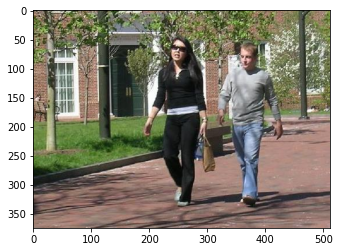

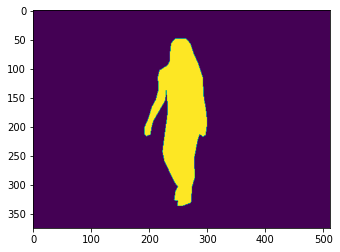

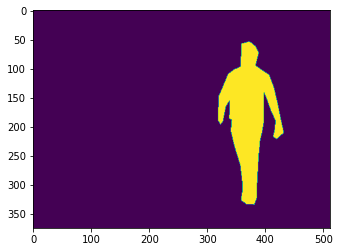

In [5]:
def main_instanced(p=Path.home() / "Data" / "Datasets" / "PennFudanPed"):

    dataset = PennFudanDataset(
        p,
        SplitEnum.training,
        return_variant=PennFudanDataset.PennFudanReturnVariantEnum.instanced,
    )

    global_torch_device(override=global_torch_device("cpu"))

    idx = -2
    img, mask = dataset[idx]
    print(img)
    print(img.shape, mask.shape)
    pyplot.imshow(float_chw_to_hwc_uint_tensor(img))
    pyplot.show()
    for m in mask:
        pyplot.imshow(m.squeeze(0))
        pyplot.show()


main_instanced(
    Path.home() / "Data3" / "PennFudanPed",
    # Path.home() / "Data" / "Datasets" / "PennFudanPed",
)

tensor([[[0.5373, 0.4902, 0.3451,  ..., 0.5059, 0.5686, 0.5216],
         [0.5529, 0.3490, 0.3647,  ..., 0.5176, 0.5333, 0.5373],
         [0.7333, 0.4667, 0.5882,  ..., 0.4706, 0.4980, 0.5569],
         ...,
         [0.6235, 0.6196, 0.6157,  ..., 0.6863, 0.6824, 0.6745],
         [0.6196, 0.6078, 0.6000,  ..., 0.6980, 0.7020, 0.6980],
         [0.6118, 0.5882, 0.5804,  ..., 0.7294, 0.7608, 0.7725]],

        [[0.4902, 0.4431, 0.3098,  ..., 0.5216, 0.5922, 0.5490],
         [0.4980, 0.2980, 0.3137,  ..., 0.5412, 0.5608, 0.5765],
         [0.6588, 0.4000, 0.5216,  ..., 0.5059, 0.5373, 0.6039],
         ...,
         [0.5176, 0.5137, 0.5098,  ..., 0.5490, 0.5490, 0.5412],
         [0.5255, 0.5216, 0.5059,  ..., 0.5608, 0.5686, 0.5647],
         [0.5255, 0.5098, 0.4941,  ..., 0.5922, 0.6275, 0.6392]],

        [[0.4353, 0.3882, 0.2431,  ..., 0.2824, 0.3412, 0.2863],
         [0.4471, 0.2353, 0.2510,  ..., 0.2980, 0.2980, 0.3059],
         [0.6039, 0.3373, 0.4588,  ..., 0.2510, 0.2667, 0.

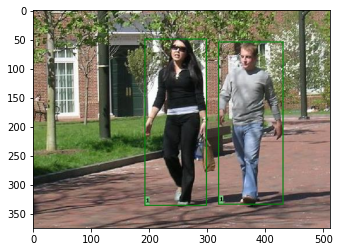

In [6]:
def main_all_bb(p=Path.home() / "Data" / "Datasets" / "PennFudanPed"):

    dataset = PennFudanDataset(
        p,
        SplitEnum.training,
        return_variant=PennFudanDataset.PennFudanReturnVariantEnum.all,
    )

    global_torch_device(override=global_torch_device("cpu"))

    idx = -2
    img, info = dataset[idx]
    print(img)
    print(img.shape)

    img = float_chw_to_hwc_uint_tensor(img).detach().numpy()
    pyplot.imshow(
        draw_boxes.draw_bounding_boxes(
            img, info["boxes"], labels=info["labels"], mode="RGB"
        )
    )
    pyplot.show()


main_all_bb(
    Path.home() / "Data3" / "PennFudanPed",
    # Path.home() / "Data" / "Datasets" / "PennFudanPed",
)